In [49]:
import pandas as pd
import numpy as np

In [50]:
hra=pd.read_csv('C:/Users/PRIYA/Desktop/CASE STUDY/HR ANALYTICS/general_data.csv')
hra.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


# Let's remove the column which contains same information,because it will not have any significance.
What i see is 'EmployeeCount','EmployeeID','Over18','StandardHours are not useful for the analysis

In [51]:
hra=hra.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'],axis=1)

In [52]:
hra.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


# To check the missing values.

In [53]:
hra.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

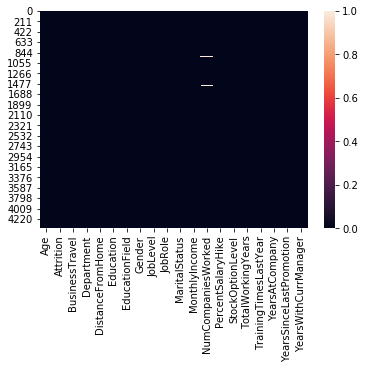

In [54]:
sns.heatmap(hra.isnull())

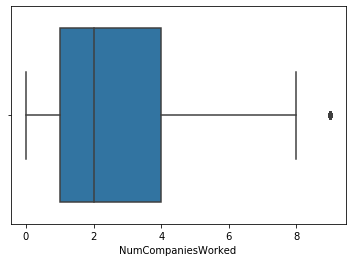

In [55]:
import seaborn as sns
sns.boxplot(hra['NumCompaniesWorked'])

# we can fill the missing values with 2,from the box plot reference

In [56]:
hra['NumCompaniesWorked']=hra['NumCompaniesWorked'].fillna(2)

In [57]:
hra.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          9
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

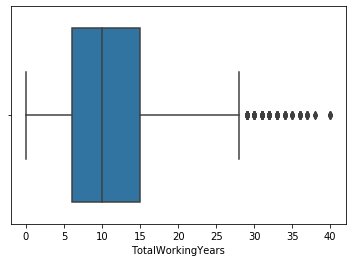

In [58]:
sns.boxplot(hra['TotalWorkingYears'])

# we can fill 10 for total working hours

In [59]:
hra['TotalWorkingYears']=hra['TotalWorkingYears'].fillna(10)

In [60]:
hra.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

Now,we don't have missing values,so we can go further.

# Replacing target variable to integer variable.

In [61]:
hra.loc[hra['Attrition']=='No','Attrition']=0
hra.loc[hra['Attrition']=='Yes','Attrition']=1

In [62]:
hra.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


# Categorising a particular feature

In [63]:
hra['Business_Travel_Rarely']=0
hra['Business_Travel_Frequently']=0
hra['Business_Non-Travel']=0

hra.loc[hra['BusinessTravel']=='Travel_Rarely','Business_Travel_Rarely'] = 1
hra.loc[hra['BusinessTravel']=='Travel_Frequently','Business_Travel_Frequently'] = 1
hra.loc[hra['BusinessTravel']=='Non-Travel','Business_Non-Travel'] = 1

In [64]:
hra.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Business_Travel_Rarely,Business_Travel_Frequently,Business_Non-Travel
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,11,0,1.0,6,1,0,0,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,23,1,6.0,3,5,1,4,0,1,0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,15,3,5.0,2,5,0,3,0,1,0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,11,3,13.0,5,8,7,5,0,0,1
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,12,2,9.0,2,6,0,4,1,0,0


# Categorising the education field

In [65]:
hra['Life Sciences']=0
hra['Medical']=0
hra['Marketing']=0
hra['Technical Degree']=0
hra['Education Human Resources']=0
hra['Education_Other']=0

hra.loc[hra['EducationField']=='Life Sciences','Life Sciences'] = 1
hra.loc[hra['EducationField']=='Medical','Medical'] = 1
hra.loc[hra['EducationField']=='Other','Education_Other'] = 1
hra.loc[hra['EducationField']=='Technical Degree','Technical Degree'] = 1
hra.loc[hra['EducationField']=='Human Resources','Education Human Resources'] = 1
hra.loc[hra['EducationField']=='Marketing','Marketing'] = 1
hra.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsWithCurrManager,Business_Travel_Rarely,Business_Travel_Frequently,Business_Non-Travel,Life Sciences,Medical,Marketing,Technical Degree,Education Human Resources,Education_Other
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,0,1,0,0,1,0,0,0,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,4,0,1,0,1,0,0,0,0,0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,3,0,1,0,0,0,0,0,0,1
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,5,0,0,1,1,0,0,0,0,0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,4,1,0,0,0,1,0,0,0,0


# Categorising the working department

In [66]:
hra['Sales']=0
hra['R&D']=0
hra['Dept_Human Resources'] =0

hra.loc[hra['Department']=='Sales','Sales'] = 1
hra.loc[hra['Department']=='Research & Development','R&D'] = 1
hra.loc[hra['Department']=='Human Resources','Dept_Human Resources'] = 1
hra.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,Business_Non-Travel,Life Sciences,Medical,Marketing,Technical Degree,Education Human Resources,Education_Other,Sales,R&D,Dept_Human Resources
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,0,1,0,0,0,0,0,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,0,1,0,0,0,0,0,0,1,0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,0,0,0,0,0,0,1,0,1,0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,1,1,0,0,0,0,0,0,1,0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,0,0,1,0,0,0,0,0,1,0


# Categorising the Job role

In [67]:
hra['Research Scientist']=0
hra['Laboratory Technician']=0
hra['Sales Executive']=0
hra['Manufacturing Director']=0
hra['Healthcare Representative']=0
hra['Sales Representative']=0
hra['Research Director']=0
hra['Manager'] = 0
hra['Job_Human_Resources'] = 0

hra.loc[hra['JobRole']=='Research Scientist','Research Scientist'] = 1
hra.loc[hra['JobRole']=='Laboratory Technician','Laboratory Technician'] = 1
hra.loc[hra['JobRole']=='Sales Executive','Sales Executive'] = 1
hra.loc[hra['JobRole']=='Sales Representative','Sales Representative'] = 1
hra.loc[hra['JobRole']=='Manufacturing Director','Manufacturing Director'] = 1
hra.loc[hra['JobRole']=='Healthcare Representative','Healthcare Representative'] = 1
hra.loc[hra['JobRole']=='Research Director','Research Director'] = 1
hra.loc[hra['JobRole']=='Manager','Manager'] = 1
hra.loc[hra['JobRole']=='Human Resources','Job_Human_Resources'] = 1
hra.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,Dept_Human Resources,Research Scientist,Laboratory Technician,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,0,0,0,0,0,1,0,0,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,0,1,0,0,0,0,0,0,0,0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,0,0,0,1,0,0,0,0,0,0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,0,0,0,0,0,0,0,0,0,1
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,0,0,0,1,0,0,0,0,0,0


# Categorising on the basis of marital status

In [68]:
hra['Marital_single']=0
hra['Marital_married']=0
hra['Marital_divorced']=0

hra.loc[hra['MaritalStatus']=='Married','Marital_married'] = 1
hra.loc[hra['MaritalStatus']=='Single','Marital_single'] = 1
hra.loc[hra['MaritalStatus']=='Divorced','Marital_divorced'] = 1

In [29]:
hra.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,0,0,1,0,0,0,0,0,1,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,0,0,0,0,0,0,0,1,0,0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,1,0,0,0,0,0,0,0,1,0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,0,0,0,0,0,0,1,0,1,0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,1,0,0,0,0,0,0,1,0,0


In [72]:
hra.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Business_Travel_Rarely',
       'Business_Travel_Frequently', 'Business_Non-Travel', 'Life Sciences',
       'Medical', 'Marketing', 'Technical Degree', 'Education Human Resources',
       'Education_Other', 'Sales', 'R&D', 'Dept_Human Resources',
       'Research Scientist', 'Laboratory Technician', 'Sales Executive',
       'Manufacturing Director', 'Healthcare Representative',
       'Sales Representative', 'Research Director', 'Manager',
       'Job_Human_Resources', 'Marital_single', 'Marital_married',
       'Marital_divorced'],
      dtype='object')

In [73]:
hra = hra.drop(['BusinessTravel','EducationField',
                        'Department','JobRole','MaritalStatus'],axis=1)
hra.head()

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
0,51,0,6,2,Female,1,131160,1.0,11,0,...,0,0,1,0,0,0,0,0,1,0
1,31,1,10,1,Female,1,41890,0.0,23,1,...,0,0,0,0,0,0,0,1,0,0
2,32,0,17,4,Male,4,193280,1.0,15,3,...,1,0,0,0,0,0,0,0,1,0
3,38,0,2,5,Male,3,83210,3.0,11,3,...,0,0,0,0,0,0,1,0,1,0
4,32,0,10,1,Male,1,23420,4.0,12,2,...,1,0,0,0,0,0,0,1,0,0


In [74]:
hra.dtypes

Age                             int64
Attrition                      object
DistanceFromHome                int64
Education                       int64
Gender                         object
JobLevel                        int64
MonthlyIncome                   int64
NumCompaniesWorked            float64
PercentSalaryHike               int64
StockOptionLevel                int64
TotalWorkingYears             float64
TrainingTimesLastYear           int64
YearsAtCompany                  int64
YearsSinceLastPromotion         int64
YearsWithCurrManager            int64
Business_Travel_Rarely          int64
Business_Travel_Frequently      int64
Business_Non-Travel             int64
Life Sciences                   int64
Medical                         int64
Marketing                       int64
Technical Degree                int64
Education Human Resources       int64
Education_Other                 int64
Sales                           int64
R&D                             int64
Dept_Human R

# We need to convert all into int value

In [83]:
hra['Attrition'] = hra['Attrition'].astype('int')
hra['Age']=hra['Age'].astype('int')
hra['NumCompaniesWorked']=hra['NumCompaniesWorked'].astype('int')
hra['TotalWorkingYears']=hra['TotalWorkingYears'].astype('int')


In [79]:
hra.dtypes

Age                            int32
Attrition                      int32
DistanceFromHome               int64
Education                      int64
Gender                        object
JobLevel                       int64
MonthlyIncome                  int64
NumCompaniesWorked             int32
PercentSalaryHike              int64
StockOptionLevel               int64
TotalWorkingYears              int32
TrainingTimesLastYear          int64
YearsAtCompany                 int64
YearsSinceLastPromotion        int64
YearsWithCurrManager           int64
Business_Travel_Rarely         int64
Business_Travel_Frequently     int64
Business_Non-Travel            int64
Life Sciences                  int64
Medical                        int64
Marketing                      int64
Technical Degree               int64
Education Human Resources      int64
Education_Other                int64
Sales                          int64
R&D                            int64
Dept_Human Resources           int64
R

In [84]:
hra.head()

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
0,51,0,6,2,Female,1,131160,1,11,0,...,0,0,1,0,0,0,0,0,1,0
1,31,1,10,1,Female,1,41890,0,23,1,...,0,0,0,0,0,0,0,1,0,0
2,32,0,17,4,Male,4,193280,1,15,3,...,1,0,0,0,0,0,0,0,1,0
3,38,0,2,5,Male,3,83210,3,11,3,...,0,0,0,0,0,0,1,0,1,0
4,32,0,10,1,Male,1,23420,4,12,2,...,1,0,0,0,0,0,0,1,0,0


In [87]:
hra.loc[hra['Gender']=='Male','Gender']=0
hra.loc[hra['Gender']=='Female','Gender']=1

In [88]:
hra.head()

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
0,51,0,6,2,1,1,131160,1,11,0,...,0,0,1,0,0,0,0,0,1,0
1,31,1,10,1,1,1,41890,0,23,1,...,0,0,0,0,0,0,0,1,0,0
2,32,0,17,4,0,4,193280,1,15,3,...,1,0,0,0,0,0,0,0,1,0
3,38,0,2,5,0,3,83210,3,11,3,...,0,0,0,0,0,0,1,0,1,0
4,32,0,10,1,0,1,23420,4,12,2,...,1,0,0,0,0,0,0,1,0,0


In [89]:
hra.dtypes

Age                            int32
Attrition                      int32
DistanceFromHome               int64
Education                      int64
Gender                        object
JobLevel                       int64
MonthlyIncome                  int64
NumCompaniesWorked             int32
PercentSalaryHike              int64
StockOptionLevel               int64
TotalWorkingYears              int32
TrainingTimesLastYear          int64
YearsAtCompany                 int64
YearsSinceLastPromotion        int64
YearsWithCurrManager           int64
Business_Travel_Rarely         int64
Business_Travel_Frequently     int64
Business_Non-Travel            int64
Life Sciences                  int64
Medical                        int64
Marketing                      int64
Technical Degree               int64
Education Human Resources      int64
Education_Other                int64
Sales                          int64
R&D                            int64
Dept_Human Resources           int64
R

In [90]:
hra['Gender']=hra['Gender'].astype('int')

In [91]:
hra.dtypes

Age                           int32
Attrition                     int32
DistanceFromHome              int64
Education                     int64
Gender                        int32
JobLevel                      int64
MonthlyIncome                 int64
NumCompaniesWorked            int32
PercentSalaryHike             int64
StockOptionLevel              int64
TotalWorkingYears             int32
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
Business_Travel_Rarely        int64
Business_Travel_Frequently    int64
Business_Non-Travel           int64
Life Sciences                 int64
Medical                       int64
Marketing                     int64
Technical Degree              int64
Education Human Resources     int64
Education_Other               int64
Sales                         int64
R&D                           int64
Dept_Human Resources          int64
Research Scientist          

# Finding correlation

In [92]:
hra.corr()

,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,Sales Executive,Manufacturing Director,Healthcare Representative,Sales Representative,Research Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
Age,1.000000,-0.159205,0.006963,-0.035706,3.935163e-02,-0.002884,-0.044314,0.298869,-0.033137,-0.031753,...,0.008219,0.001261,-0.051511,-0.014096,-1.605906e-02,0.009020,0.001194,-0.119185,0.083919,0.033120
Attrition,-0.159205,1.000000,-0.009730,-0.015111,-1.812508e-02,-0.010290,-0.031176,0.042064,0.032533,-0.006839,...,0.010869,-0.045770,-0.013768,-0.011073,4.976045e-02,-0.017798,-0.013857,0.175419,-0.090984,-0.087716
DistanceFromHome,0.006963,-0.009730,1.000000,-0.008638,4.417279e-02,-0.037329,-0.021607,-0.013514,0.038125,0.011169,...,-0.012479,0.000305,-0.016564,0.005463,-3.848864e-03,-0.038859,0.001813,-0.042204,0.038151,0.001624
Education,-0.035706,-0.015111,-0.008638,1.000000,1.654683e-02,0.045746,0.006410,-0.016195,-0.040531,0.001261,...,-0.004180,-0.011976,-0.013044,0.032320,4.969407e-02,0.044142,0.045063,0.024114,-0.008534,-0.016818
Gender,0.039352,-0.018125,0.044173,0.016547,1.000000e+00,0.026854,-0.007530,0.067120,-0.011841,-0.019237,...,0.005348,0.004657,0.002924,0.010829,5.428574e-16,0.044809,-0.006014,-0.011910,0.035675,-0.029382
JobLevel,-0.002884,-0.010290,-0.037329,0.045746,2.685434e-02,1.000000,0.047316,-0.010116,0.010973,0.000993,...,-0.021969,-0.004684,0.007818,-0.024790,3.220675e-02,0.025348,0.028870,-0.021163,0.007360,0.014915
MonthlyIncome,-0.044314,-0.031176,-0.021607,0.006410,-7.530386e-03,0.047316,1.000000,-0.020515,0.004325,0.026930,...,0.001785,0.029201,-0.026887,0.001776,2.262309e-03,-0.009477,-0.026453,-0.051774,0.020189,0.033872
NumCompaniesWorked,0.298869,0.042064,-0.013514,-0.016195,6.712006e-02,-0.010116,-0.020515,1.000000,0.031062,0.017282,...,-0.019397,0.003980,0.009929,0.013684,1.321207e-02,-0.005619,0.025142,-0.020569,-0.015116,0.041174
PercentSalaryHike,-0.033137,0.032533,0.038125,-0.040531,-1.184147e-02,0.010973,0.004325,0.031062,1.000000,0.012548,...,-0.041760,-0.017697,0.019939,0.066547,-9.640495e-03,-0.003199,-0.035124,0.013365,-0.015678,0.003794
StockOptionLevel,-0.031753,-0.006839,0.011169,0.001261,-1.923659e-02,0.000993,0.026930,0.017282,0.012548,1.000000,...,0.040747,0.031840,0.008415,-0.030767,-2.996103e-02,-0.081638,-0.009864,0.032327,-0.038920,0.010374


# Dividing the data into train and test data set

In [97]:
from sklearn.model_selection import train_test_split
from random import seed

seed(20)
train_x = hra.drop(['Attrition'],axis=1)
train_y = hra['Attrition']

X,test_x,Y,test_y = train_test_split(train_x, train_y, test_size=0.3,random_state=20)
len(test_x)

1323

In [98]:
len(X)

3087

# Logistic regression

In [100]:
from sklearn.linear_model import LogisticRegression

Y=Y.astype('int')

clf = LogisticRegression()
clf.fit(np.array(X),Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Checking the accuracy of the model

In [101]:
from sklearn.metrics import accuracy_score

pred_y = clf.predict(test_x)

accuracy = accuracy_score(test_y, pred_y, normalize=True, sample_weight=None)
accuracy

0.8306878306878307

# we are getting accuracy of 83.06%


# let's see the qantitative estiamtes

In [102]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1099
           1       0.00      0.00      0.00       224

    accuracy                           0.83      1323
   macro avg       0.42      0.50      0.45      1323
weighted avg       0.69      0.83      0.75      1323



C:\Users\PRIYA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Let's see if i can increase the model accuracy

Apply recursive function

In [103]:
from sklearn.feature_selection import RFE

rfe = RFE(clf,40)
rfe = rfe.fit(train_x,train_y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


Transforming data to desired number of features

In [104]:
X =rfe.transform(X)
X.shape

(3087, 38)

In [105]:
test_x = rfe.transform(test_x)
test_x.shape

(1323, 38)

# Calculating accuracy of the model

In [106]:
from sklearn.metrics import accuracy_score

clf.fit(X,Y)
pred_y = clf.predict(test_x)

accuracy = accuracy_score(test_y, pred_y, normalize=True, sample_weight=None)
accuracy


0.8306878306878307

# This is the final accuracy i can get,i have tried for improving but results are same.